In [ ]:
import numpy as np
import numpy
import scipy.io.wavfile
from scipy.fftpack import dct

# from sklearn import mixture
# from sklearn.externals import joblib
import glob

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import librosa

import IPython.display as ipd
import librosa.display

import scipy.stats as st

In [ ]:
import librosa

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


Audio Signal Vector: 
[-8.3265077e-06  1.5533888e-05 -2.3583249e-05 ...  1.2473836e-04
 -6.0263566e-05  0.0000000e+00]


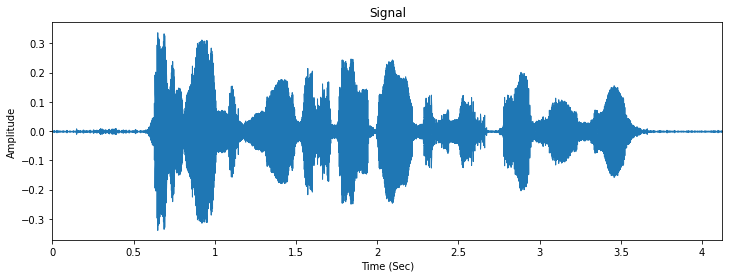

In [ ]:
x, sr = librosa.load('/content/drive/My Drive/data/VIVOSSPK02_R001.wav')
print("Audio Signal Vector: \n{}".format(x))
plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Signal')
plt.ylabel('Amplitude')
plt.xlabel('Time (Sec)')
plt.show()

In [ ]:
ipd.Audio(x, rate=sr)

In [ ]:
sample_rate, signal = scipy.io.wavfile.read('/content/drive/My Drive/data/VIVOSSPK02_R001.wav')
i = 4
signal = signal[0:int(i * sample_rate)]  # Keep the first i seconds

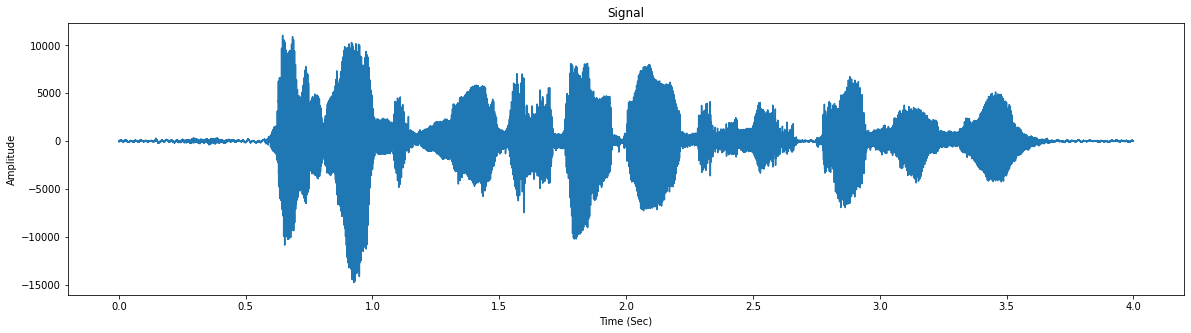

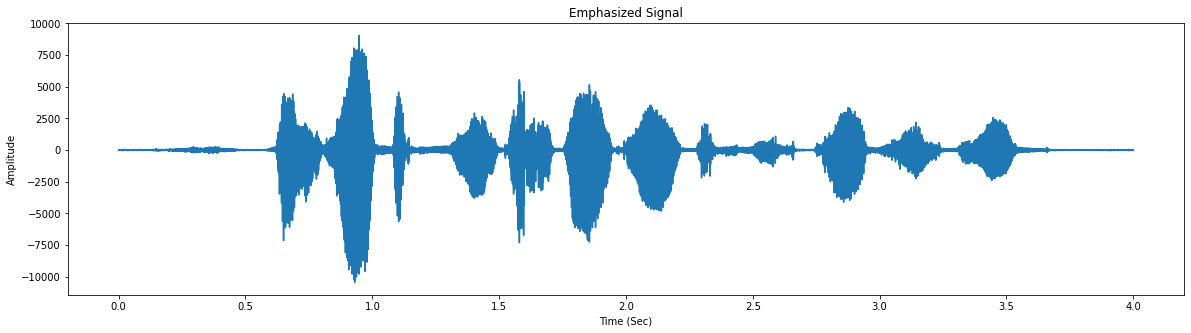

In [ ]:
Time=np.linspace(0, len(signal)/sample_rate, num=len(signal))

plt.figure(figsize=(20,5))
plt.plot(Time,signal)
plt.title('Signal')
plt.ylabel('Amplitude')
plt.xlabel('Time (Sec)')
plt.show()

pre_emphasis = 0.97
emphasized_signal = numpy.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])

Time=np.linspace(0, len(emphasized_signal)/sample_rate, num=len(emphasized_signal))

plt.figure(figsize=(20,5))
plt.plot(Time,emphasized_signal)
plt.title('Emphasized Signal')
plt.ylabel('Amplitude')
plt.xlabel('Time (Sec)')
plt.show()

In [ ]:
ipd.Audio(emphasized_signal, rate=sr)

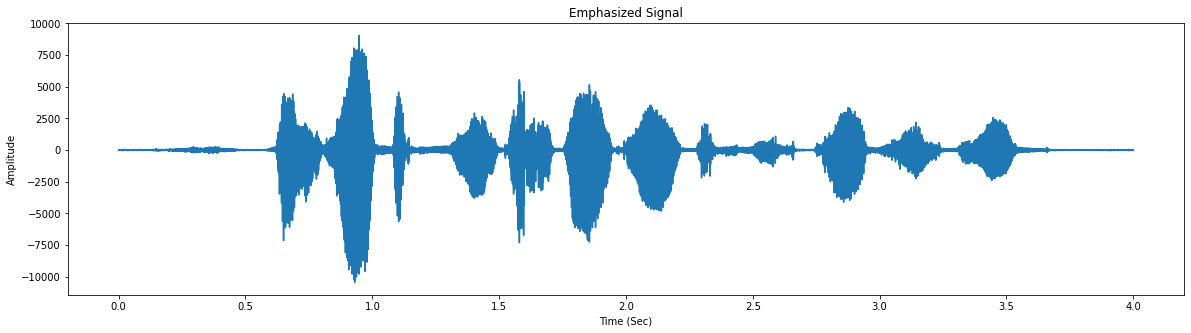

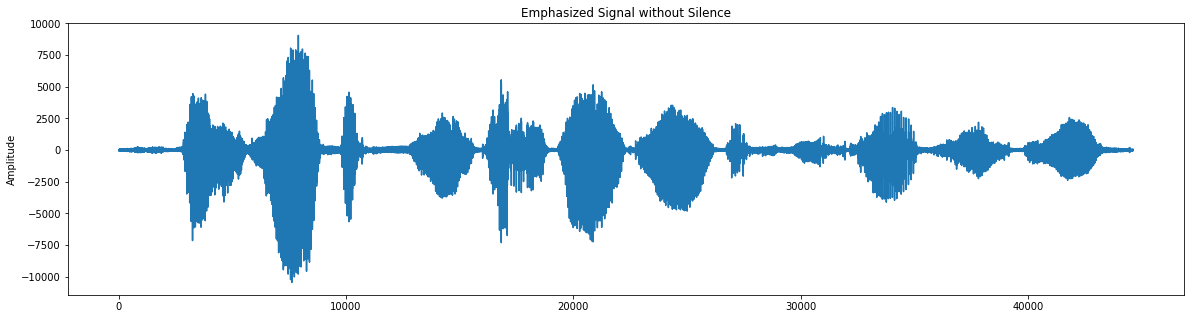

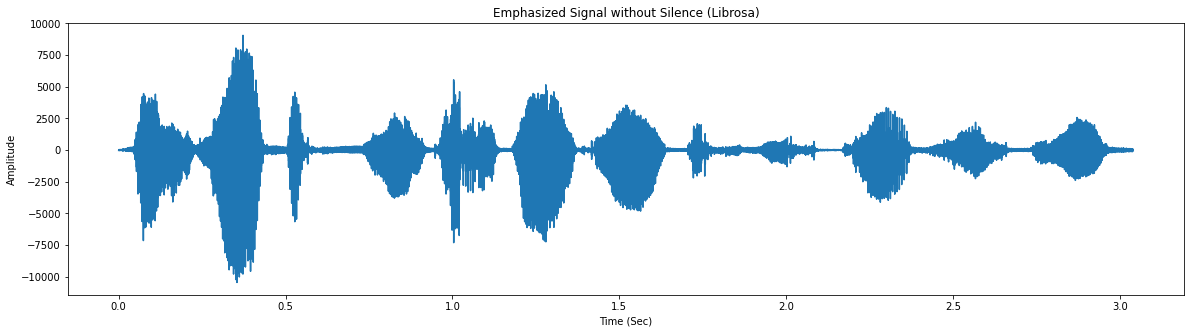

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(Time,emphasized_signal)
plt.title('Emphasized Signal')
plt.ylabel('Amplitude')
plt.xlabel('Time (Sec)')
plt.show()

s = emphasized_signal[ numpy.absolute(emphasized_signal) > 30]

plt.figure(figsize=(20,5))
plt.plot(s)
plt.title('Emphasized Signal without Silence')
plt.ylabel('Amplitude')
plt.show()

# remove silence
y = librosa.effects.split(emphasized_signal,top_db=30)
l = []
for i in y:
    l.append( emphasized_signal[i[0]:i[1]] )
emphasized_signal = np.concatenate(l,axis=0)

Time=np.linspace(0, len(emphasized_signal)/sample_rate, num=len(emphasized_signal))

plt.figure(figsize=(20,5))
plt.plot(Time,emphasized_signal)
plt.title('Emphasized Signal without Silence (Librosa)')
plt.ylabel('Amplitude')
plt.xlabel('Time (Sec)')
plt.show()

In [ ]:
print("My Augmentation")
ipd.Audio(s, rate=sample_rate)

My Augmentation


In [ ]:
print("Librosa Augmentation")
ipd.Audio(emphasized_signal, rate=sample_rate)

Librosa Augmentation


In [ ]:
VTH_Multiplier = 0.025
VTH_range=100
energy = [ a**2 for a in emphasized_signal]
Voiced_Threshold = VTH_Multiplier*np.mean(energy)
clean_samples=[0]

for sample_set in range(0,len(emphasized_signal)-VTH_range,VTH_range):
    sample_set_th = np.mean(energy[sample_set:sample_set+VTH_range])
    if sample_set_th>Voiced_Threshold:
        clean_samples.extend(emphasized_signal[sample_set:sample_set+VTH_range])

s = np.array(clean_samples)

In [ ]:
print("Normalized")
ipd.Audio(s, rate=sample_rate)

Normalized


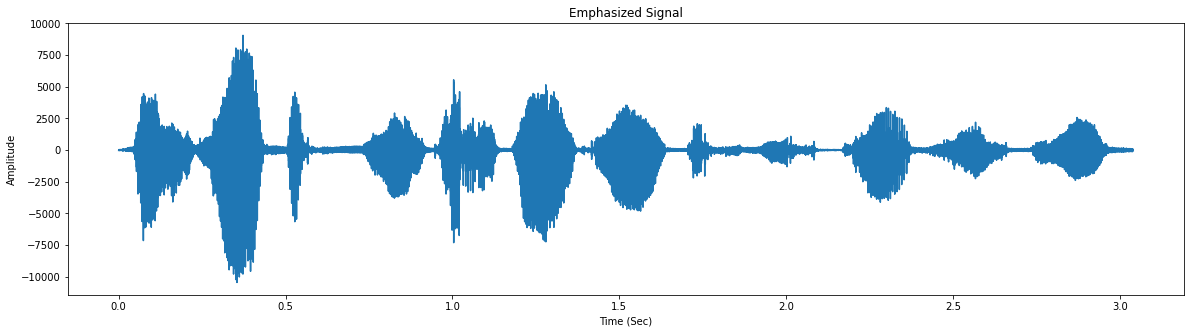

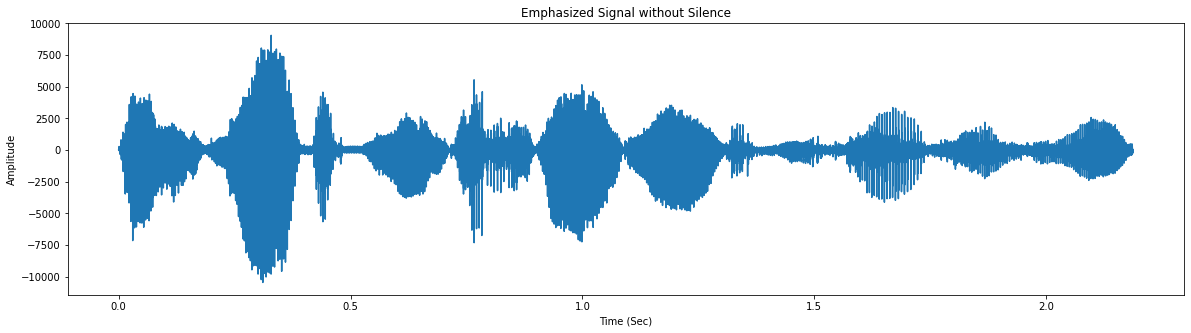

In [ ]:
Time=np.linspace(0, len(emphasized_signal)/sample_rate, num=len(emphasized_signal))

plt.figure(figsize=(20,5))
plt.plot(Time,emphasized_signal)
plt.title('Emphasized Signal')
plt.ylabel('Amplitude')
plt.xlabel('Time (Sec)')
plt.show()

Time=np.linspace(0, len(s)/sample_rate, num=len(s))

plt.figure(figsize=(20,5))
plt.plot(Time,s)
plt.title('Emphasized Signal without Silence')
plt.ylabel('Amplitude')
plt.xlabel('Time (Sec)')
plt.show()

In [ ]:
print("Unnormalized")
ipd.Audio(emphasized_signal, rate=sample_rate)

Unnormalized


In [ ]:
print("Normalized")
ipd.Audio(s, rate=sample_rate)

Normalized


In [ ]:
# use normalized signal
emphasized_signal = s

In [ ]:
frame_size = 0.025
frame_stride = 0.01

frame_length, frame_step = frame_size * sample_rate, frame_stride * sample_rate  # Convert from seconds to samples
signal_length = len(emphasized_signal)
frame_length = int(round(frame_length))
frame_step = int(round(frame_step))
num_frames = int(numpy.ceil(float(numpy.abs(signal_length - frame_length)) / frame_step))  # Make sure that we have at least 1 frame

pad_signal_length = num_frames * frame_step + frame_length
z = numpy.zeros((pad_signal_length - signal_length))
pad_signal = numpy.append(emphasized_signal, z) # Pad Signal to make sure that all frames have equal number of samples without truncating any samples from the original signal

indices = numpy.tile(numpy.arange(0, frame_length), (num_frames, 1)) + numpy.tile(numpy.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
frames = pad_signal[indices.astype(numpy.int32, copy=False)]

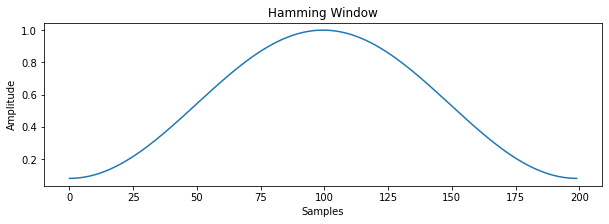

In [ ]:
x = numpy.hamming(200)

plt.figure(figsize=(10,3))
plt.plot(x)
plt.title('Hamming Window')
plt.ylabel('Amplitude')
plt.xlabel('Samples')
plt.show()

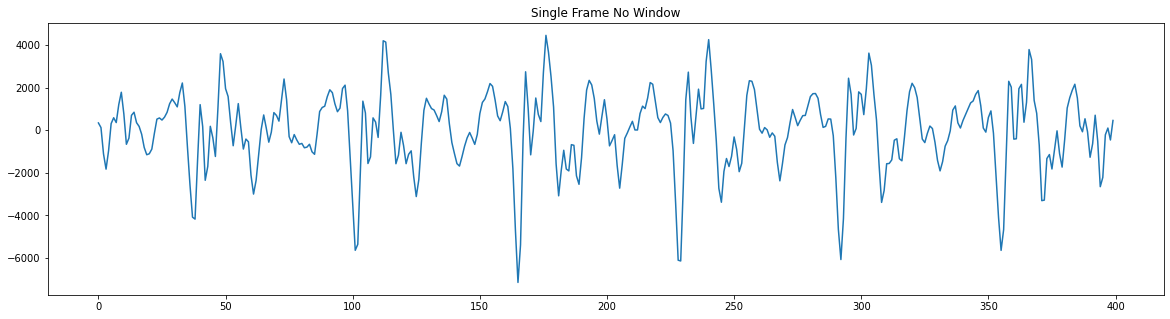

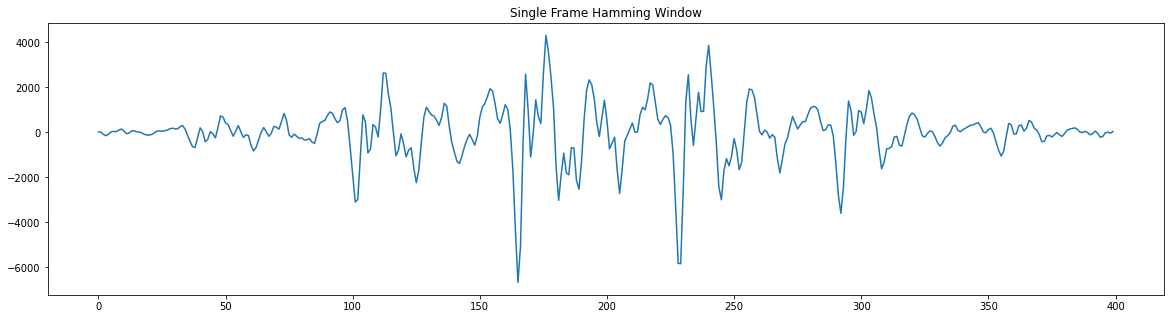

In [ ]:
f = frames * numpy.hamming(frame_length)
# frames *= numpy.hamming(frame_length)
# frames *= 0.54 - 0.46 * numpy.cos((2 * numpy.pi * n) / (frame_length - 1))  # Explicit Implementation **

x = frames[2]
plt.figure(figsize=(20,5))
plt.plot(x)
plt.title("Single Frame No Window")
plt.show()

x = f[2]
plt.figure(figsize=(20,5))
plt.plot(x)
plt.title("Single Frame Hamming Window")
plt.show()

frames = f

In [ ]:
NFFT = 512
mag_frames = numpy.absolute(numpy.fft.rfft(frames, NFFT))  # Magnitude of the FFT

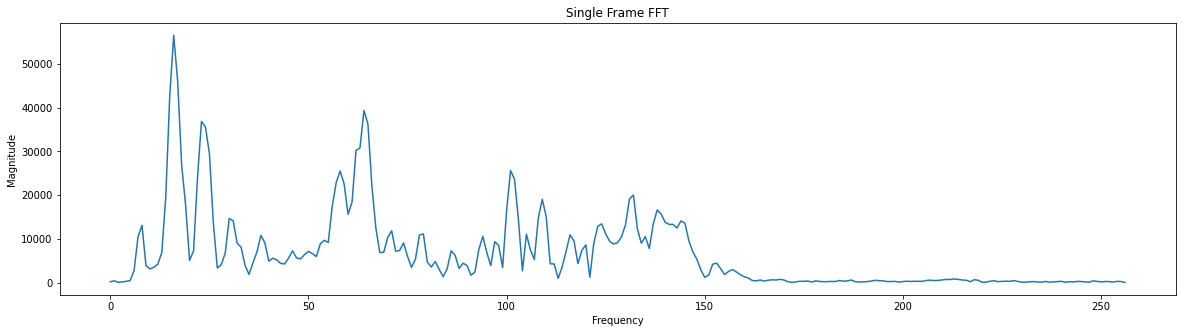

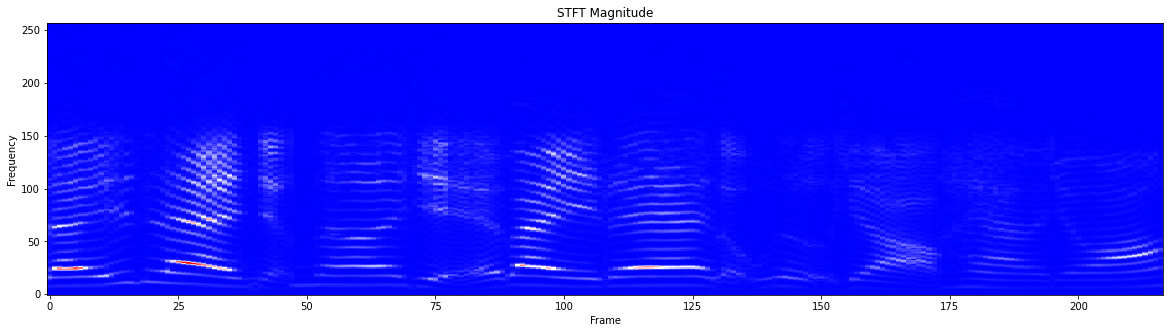

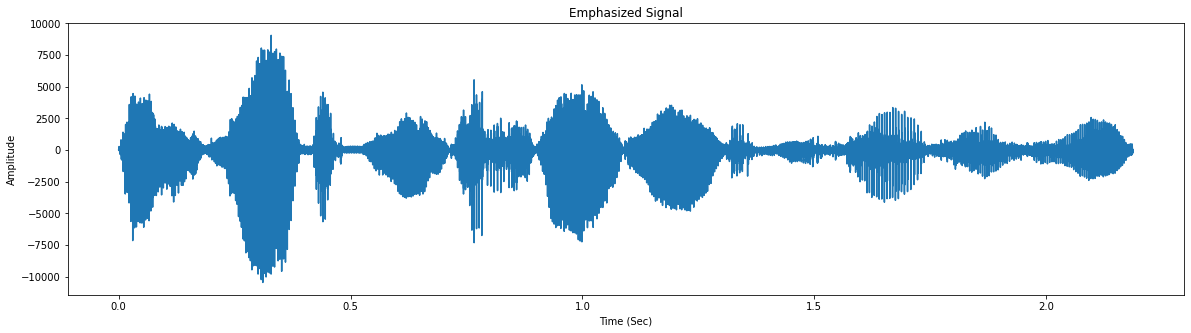

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(mag_frames[0])
plt.title("Single Frame FFT")
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

fig, ax = plt.subplots(figsize=(20,5))
cax = ax.imshow(mag_frames.T, interpolation='nearest', cmap=cm.bwr, origin='lower', aspect='auto')
plt.title("STFT Magnitude")
plt.xlabel('Frame')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(20,5))
plt.plot(Time,emphasized_signal)
plt.title('Emphasized Signal')
plt.ylabel('Amplitude')
plt.xlabel('Time (Sec)')
plt.show()

In [ ]:
pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))  # Power Spectrum

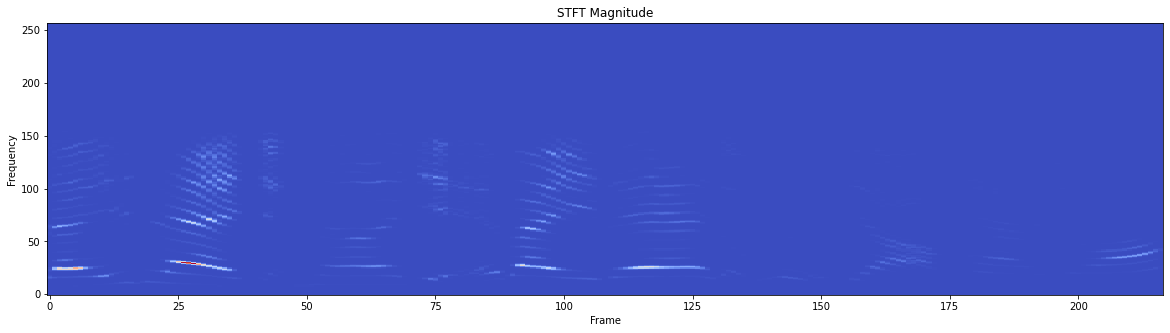

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
cax = ax.imshow(pow_frames.T, interpolation='nearest', cmap=cm.coolwarm, origin='lower', aspect='auto')
plt.title("STFT Magnitude")
plt.xlabel('Frame')
plt.ylabel('Frequency')
plt.show()

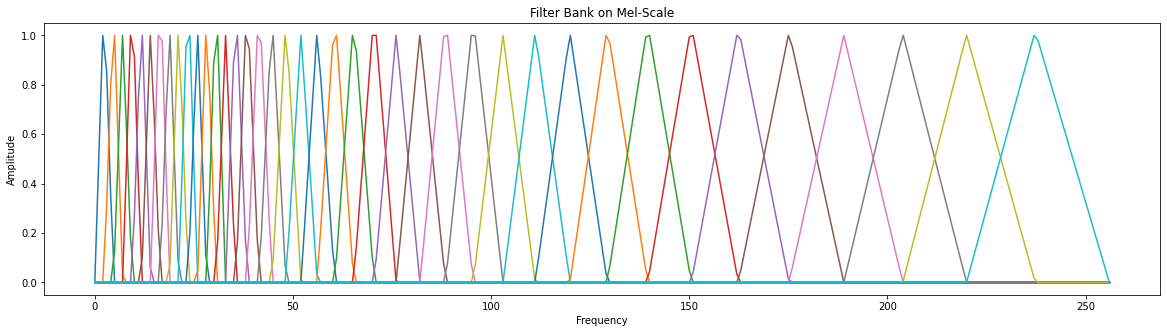

In [ ]:
sr = sample_rate
n_fft = 512
n = 40
mels = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n,fmin=0, fmax=sr / 2)
mels /= np.max(mels, axis=-1)[:, None]

plt.figure(figsize=(20,5))
plt.plot(mels.T)
plt.title("Filter Bank on Mel-Scale")
plt.ylabel("Amplitude")
plt.xlabel("Frequency")
plt.show()

In [ ]:
nfilt = 40
low_freq_mel = 0
high_freq_mel = (2595 * numpy.log10(1 + (sample_rate / 2) / 700))  # Convert Hz to Mel
mel_points = numpy.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Equally spaced in Mel scale
hz_points = (700 * (10**(mel_points / 2595) - 1))  # Convert Mel to Hz
bin = numpy.floor((NFFT + 1) * hz_points / sample_rate)

fbank = numpy.zeros((nfilt, int(numpy.floor(NFFT / 2 + 1))))
for m in range(1, nfilt + 1):
    f_m_minus = int(bin[m - 1])   # left
    f_m = int(bin[m])             # center
    f_m_plus = int(bin[m + 1])    # right

    for k in range(f_m_minus, f_m):
        fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
    for k in range(f_m, f_m_plus):
        fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])
filter_banks = numpy.dot(pow_frames, fbank.T)
filter_banks = numpy.where(filter_banks == 0, numpy.finfo(float).eps, filter_banks)  # Numerical Stability
filter_banks = 20 * numpy.log10(filter_banks)

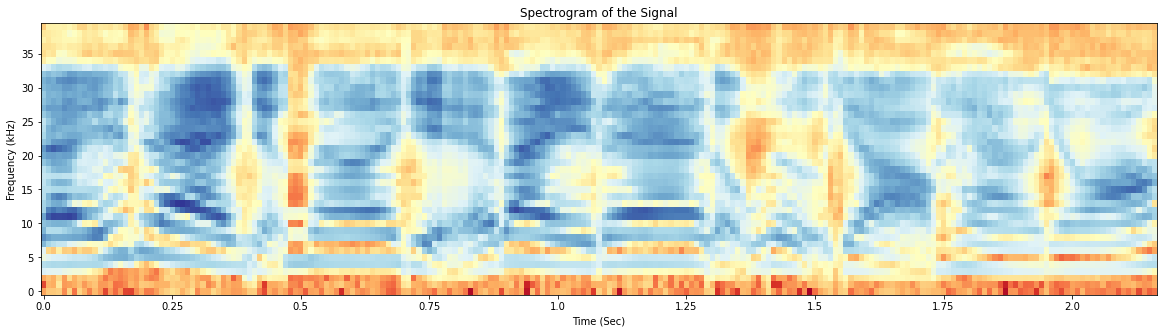

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
cax = ax.imshow(filter_banks.T, interpolation='nearest', cmap=cm.RdYlBu, origin='lower', aspect='auto')
plt.title("Spectrogram of the Signal")
plt.xlabel('Time (Sec)')
plt.ylabel('Frequency (kHz)')
a = np.array( ax.get_xticks().tolist() )
a = a / 100.0
ax.set_xticklabels(a)
plt.show()

In [ ]:
num_ceps = 12
cep_lifter = 22
mfcc = dct(filter_banks, type=2, axis=1, norm='ortho')[:, 1 : (num_ceps + 1)] # Keep 2-13
(nframes, ncoeff) = mfcc.shape
n = numpy.arange(ncoeff)
lift = 1 + (cep_lifter / 2) * numpy.sin(numpy.pi * n / cep_lifter)
mfcc *= lift

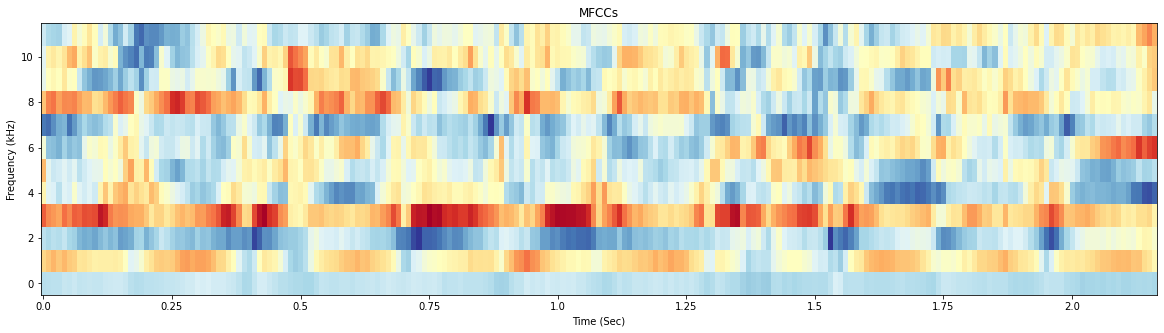

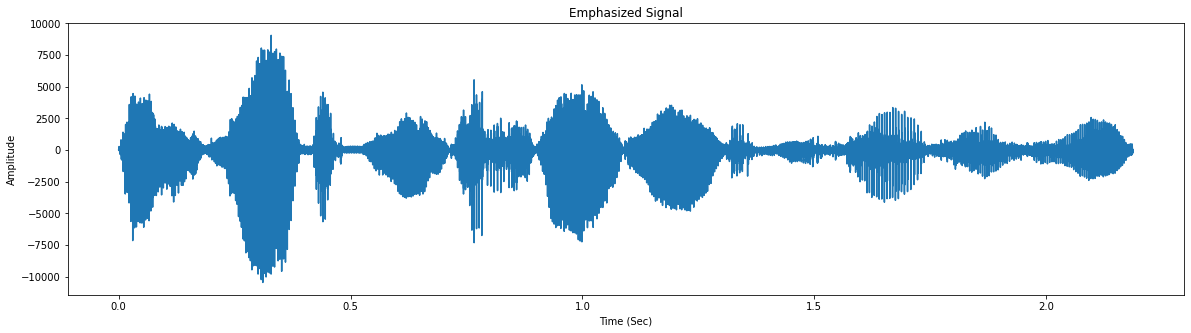

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
cax = ax.imshow(mfcc.T, interpolation='nearest', cmap=cm.RdYlBu, origin='lower', aspect='auto')
plt.title("MFCCs")
plt.xlabel('Time (Sec)')
plt.ylabel('Frequency (kHz)')
a = np.array( ax.get_xticks().tolist() )
a = a / 100.0
ax.set_xticklabels(a)
plt.show()

plt.figure(figsize=(20,5))
plt.plot(Time,emphasized_signal)
plt.title('Emphasized Signal')
plt.ylabel('Amplitude')
plt.xlabel('Time (Sec)')
plt.show()

In [ ]:
filter_banks -= (numpy.mean(filter_banks, axis=0) + 1e-8)


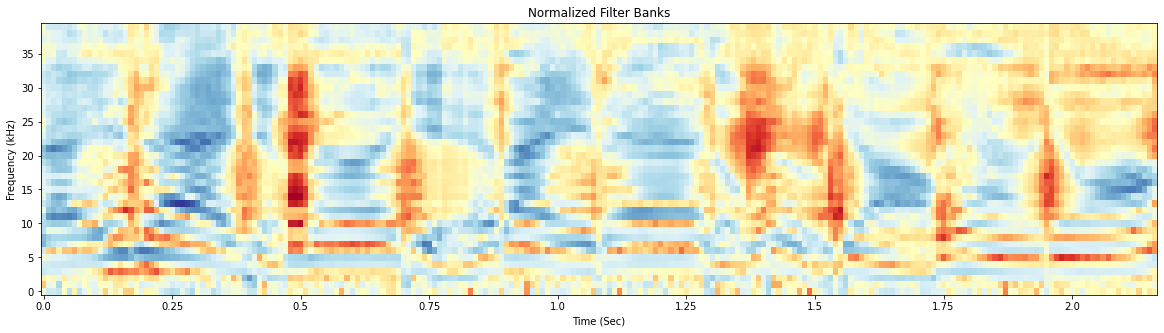

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
cax = ax.imshow(filter_banks.T, interpolation='nearest', cmap=cm.RdYlBu, origin='lower', aspect='auto')
plt.title("Normalized Filter Banks")
plt.xlabel('Time (Sec)')
plt.ylabel('Frequency (kHz)')
a = np.array( ax.get_xticks().tolist() )
a = a / 100.0
ax.set_xticklabels(a)
plt.show()

In [ ]:
mfcc -= (numpy.mean(mfcc, axis=0) + 1e-8)


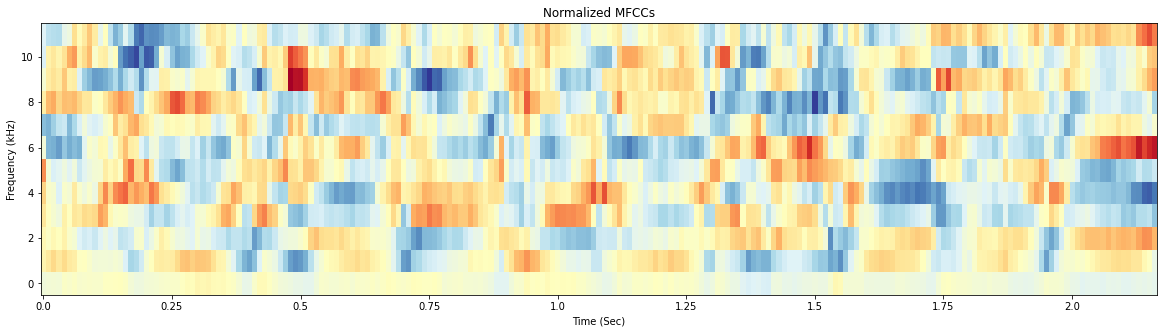

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
cax = ax.imshow(mfcc.T, interpolation='nearest', cmap=cm.RdYlBu, origin='lower', aspect='auto')
plt.title("Normalized MFCCs")
plt.xlabel('Time (Sec)')
plt.ylabel('Frequency (kHz)')
a = np.array( ax.get_xticks().tolist() )
a = a / 100.0
ax.set_xticklabels(a)
plt.show()

In [37]:
#Calulate delta and delta2 MFCC
delta_mfcc = librosa.feature.delta(mfcc)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

In [39]:
delta_mfcc.shape

(217, 12)

In [40]:
mfcc.shape

(217, 12)

In [45]:

librosa.display.specshow(delta_mfcc, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2f")
plt.show()

TypeError: ignored